<a href="https://colab.research.google.com/github/irhamadm/Dummy-Data-Mining/blob/main/Dummy_Project_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DATA PERHARI

##ANALISIS EKSPLORASI DATA

###Import Library

In [ ]:
import pandas as pd
#pandas berfungsi untuk menganalisa, memanipulasi, mengeksplorasi, dan melakukan pembersihan data.
import numpy as np
#numpy digunakan untuk membuat n-dimensi objek data, dan melakukan operasi matematika.
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler, MinMaxScaler, TargetEncoder, OneHotEncoder
#Power Transformer dapat digunakan untuk melakukan Transformasi Yeo-Johnson dan Transformasi Box-Cox. StandardScaler digunakan untuk melakukan standarisasi dengan menghapus mean dan melakukan scaling terhadap varian dari data. RobustScaler digunakan apabila data terdapat banyak outlier. MinMaxScaler melakukan transformasi dengan scaling ke range yang ditentukan. TargetEncoder digunakan untuk regresi dan klasifikasi. OneHotEncoder digunakan untuk mengubah variabel kategorik menjadi variabel numerik.
import matplotlib.pyplot as plt
#matplotlib digunakan untuk visualisasi data yang dapat dikustomisasi
import seaborn as sns
#seaborn digunakan untuk visualisasi data dengan cepat
import missingno as msno
#missingno digunakan untuk visualisasi dan analisis pola data hilang dalam sebuah data set
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
#warnings digunakan untuk mengacuhkan peringatan atau warning yang muncul

###Import Data

In [ ]:
df = pd.read_csv('/content/day.csv')
# Menampilkan data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Menghapus kolom yang tidak diperlukan dan variabel dependen
df = df.drop(columns = ['instant','dteday'])

# Mengubah variabel dependen menjadi kategorik
mean_cnt = df['cnt'].mean()
df['cnt'] = df['cnt'].apply(lambda x: 1 if x < mean_cnt else 2)

In [ ]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,1
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,1
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1


In [ ]:
#Memisahkan data dengan variabel dependen
df_1 = df.copy()
df_1 = df_1.drop(columns = ['cnt'])
df_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518


##VALIDASI DATA (Missing Value, Outlier, dan Transformasi)

###Cek Missing Value

<Axes: >

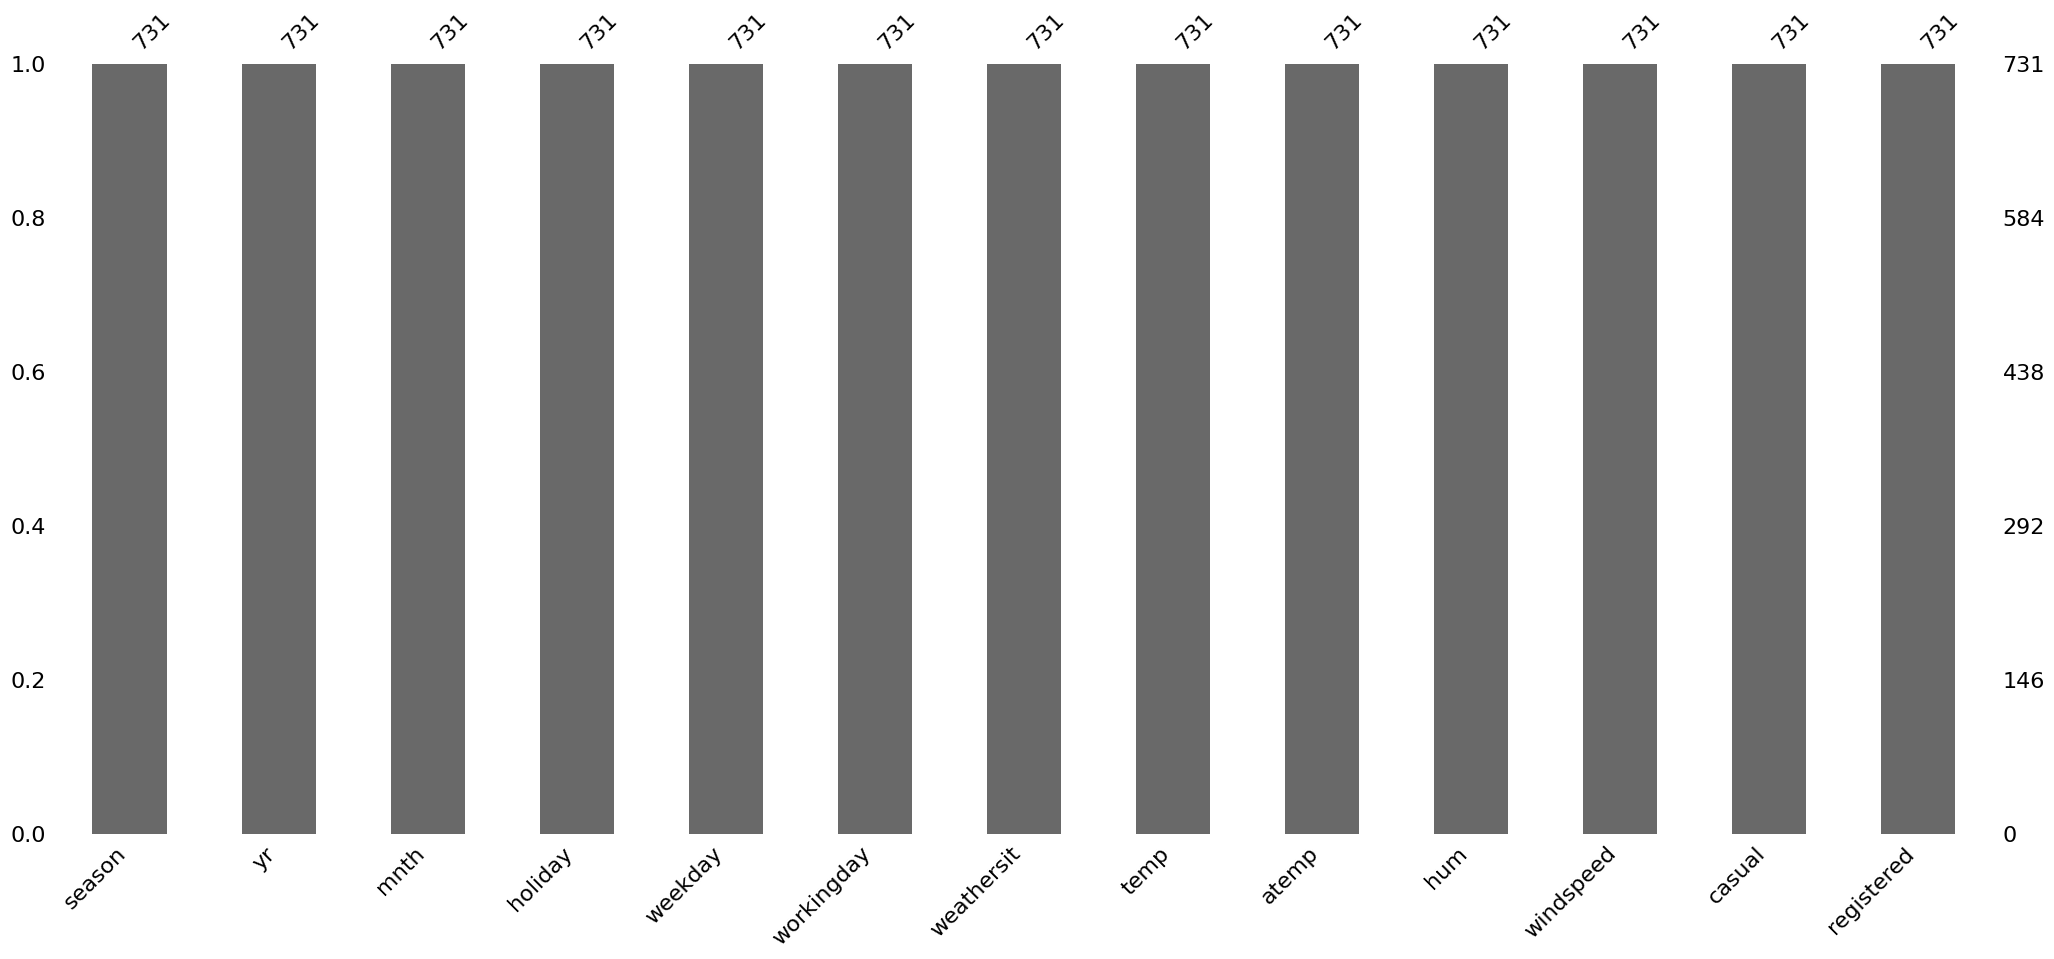

In [ ]:
msno.bar(df_1)

###Cek Outlier

In [ ]:
numerical = df_1.select_dtypes(include=['int64', 'float64']).columns
len(numerical)

13

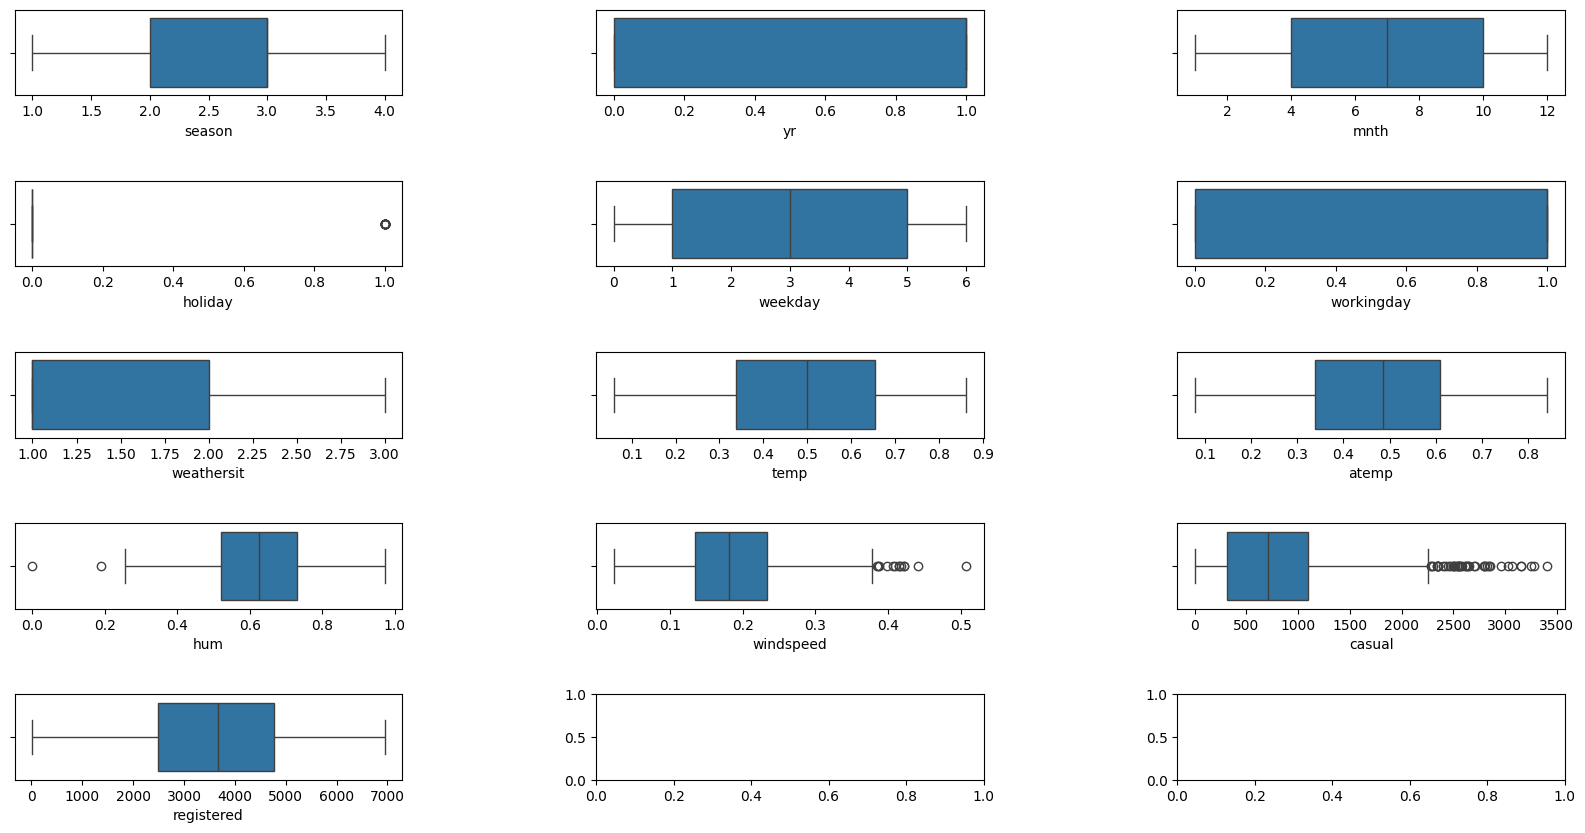

In [ ]:
#plot boxplot for each numerical variables

fig, axes = plt.subplots(5,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df_1,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

In [ ]:
# Memeriksa informasi apakah ada nilai minimum dan maksimum pada data
pd.DataFrame({
    'Min': df_1.min(),              # Menghitung nilai minimum di setiap kolom
    'Max': df_1.max()               # Menghitung nilai maksimum di setiap kolom
})

,Min,Max
season,1.000000,4.000000
yr,0.000000,1.000000
mnth,1.000000,12.000000
holiday,0.000000,1.000000
weekday,0.000000,6.000000
workingday,0.000000,1.000000
weathersit,1.000000,3.000000
temp,0.059130,0.861667
atemp,0.079070,0.840896
hum,0.000000,0.972500


###Penanganan Outlier (Winsorizing)

In [ ]:
def winsorizing_outlier(df_1,fitur):
  data_filtered = df_1.copy()
  for col in numerical:
    data = data_filtered[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_filtered[col] = data_filtered[col].clip(lower_bound,upper_bound)

  return data_filtered

df_tmp = winsorizing_outlier(df_1,numerical)
df_tmp

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867
727,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451
728,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182
729,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432


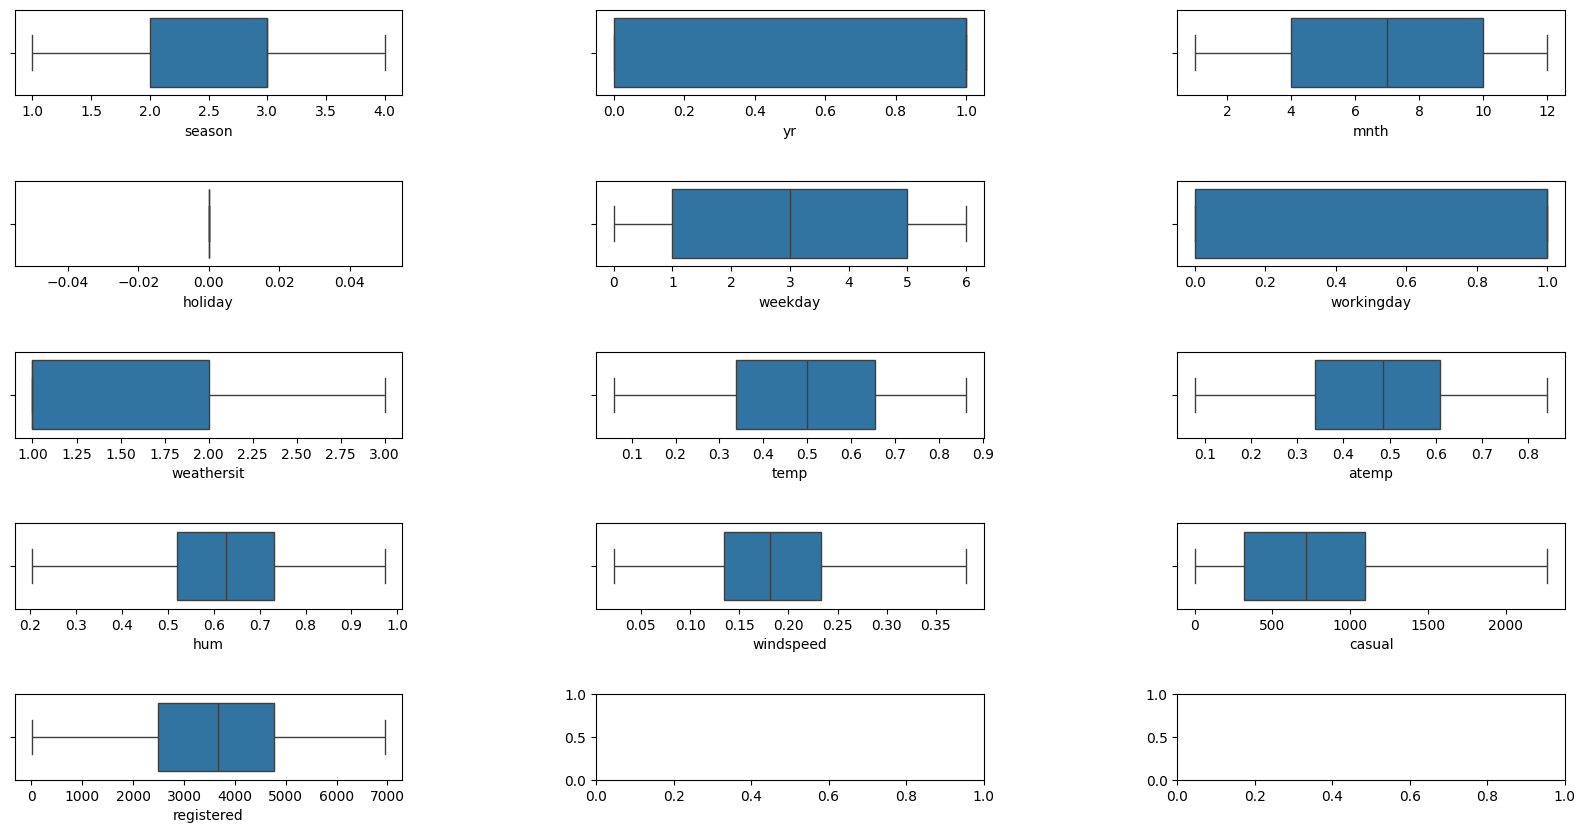

In [ ]:
fig, axes = plt.subplots(5,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df_tmp ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

In [ ]:
# Memeriksa informasi apakah ada nilai minimum dan maksimum pada data
pd.DataFrame({
    'Min': df_tmp.min(),              # Menghitung nilai minimum di setiap kolom
    'Max': df_tmp.max()               # Menghitung nilai maksimum di setiap kolom
})

,Min,Max
season,1.000000,4.000000
yr,0.000000,1.000000
mnth,1.000000,12.000000
holiday,0.000000,0.000000
weekday,0.000000,6.000000
workingday,0.000000,1.000000
weathersit,1.000000,3.000000
temp,0.059130,0.861667
atemp,0.079070,0.840896
hum,0.204687,0.972500


###Transformasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

prep_pipeline = ColumnTransformer([
    ('minmax', StandardScaler(), numerical)
    ],remainder = 'passthrough').set_output(transform="pandas")

df_trans = prep_pipeline.fit_transform(df_tmp)

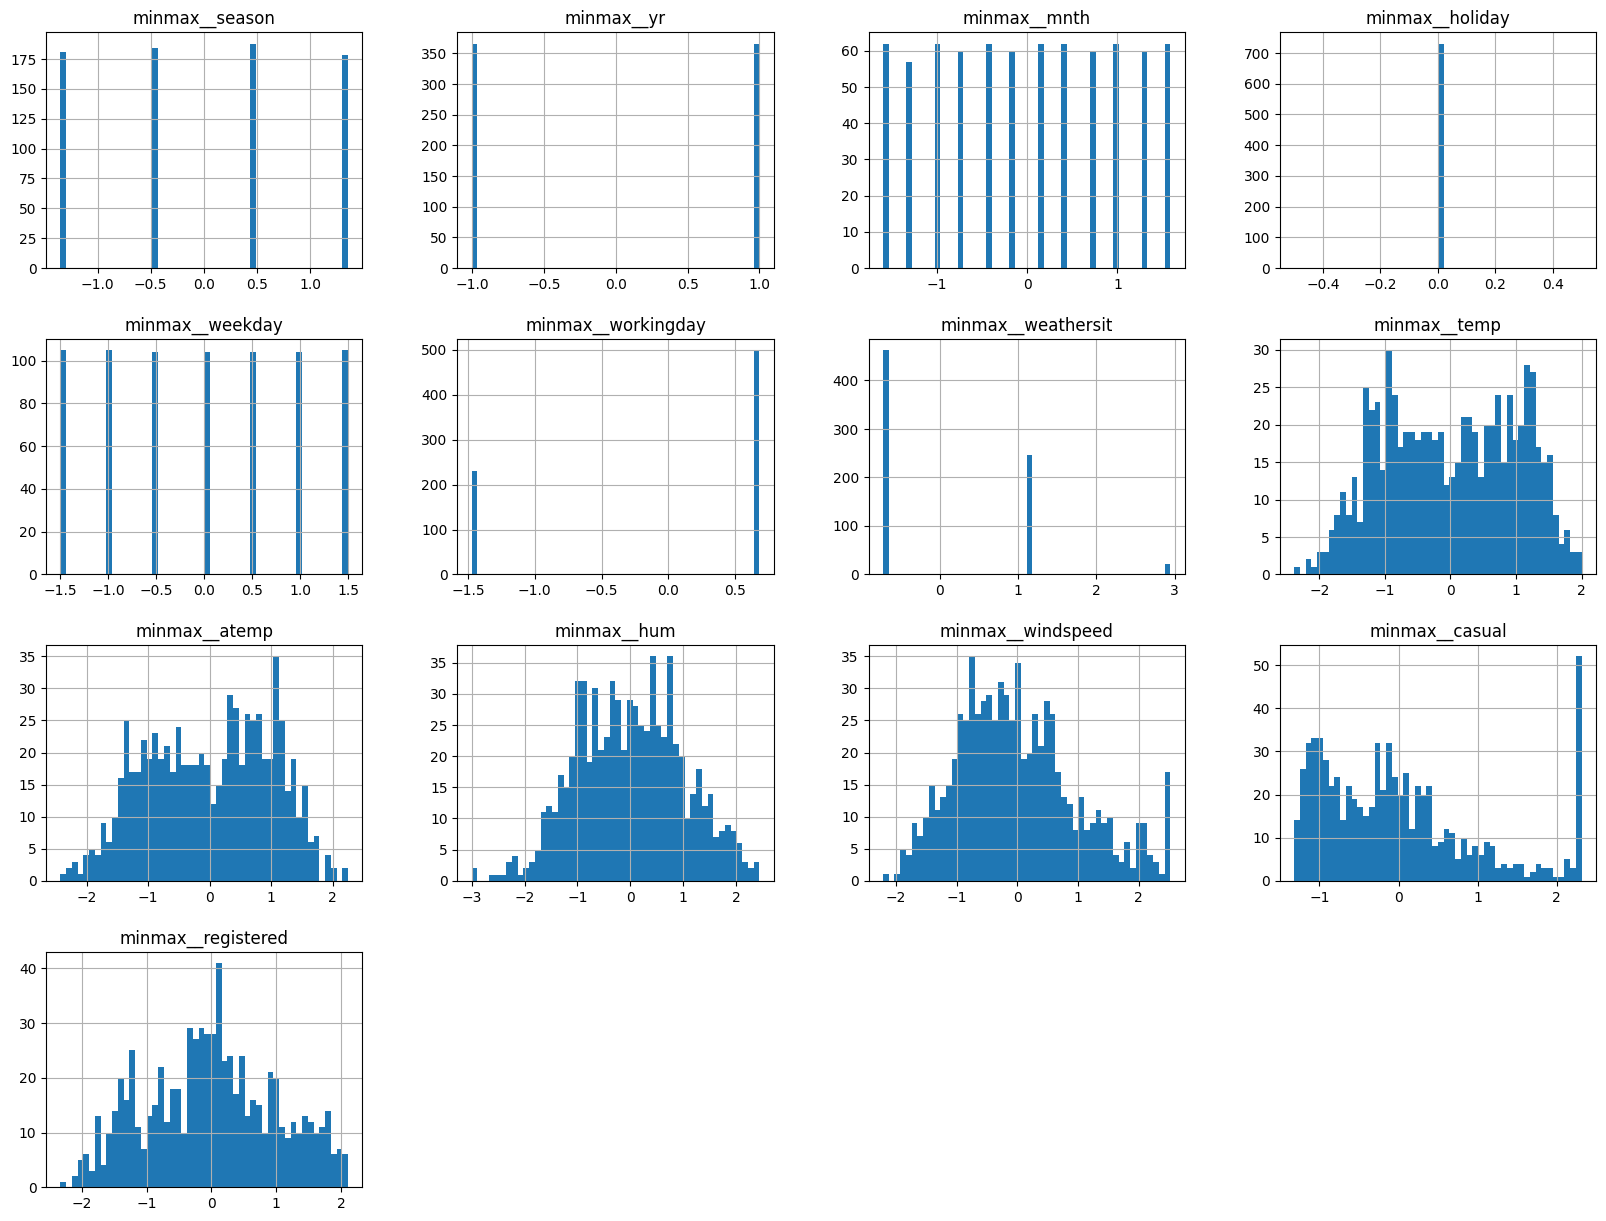

,minmax__season,minmax__yr,minmax__mnth,minmax__holiday,minmax__weekday,minmax__workingday,minmax__weathersit,minmax__temp,minmax__atemp,minmax__hum,minmax__windspeed,minmax__casual,minmax__registered
0,-1.348213,-1.001369,-1.600161,0.0,1.498809,-1.471225,1.110427,-0.826662,-0.679946,1.257836,-0.388927,-0.791681,-1.925471
1,-1.348213,-1.001369,-1.600161,0.0,-1.496077,-1.471225,1.110427,-0.721095,-0.740652,0.480727,0.776447,-1.112597,-1.915209
2,-1.348213,-1.001369,-1.600161,0.0,-0.996930,0.679706,-0.726048,-1.634657,-1.749767,-1.351928,0.773404,-1.130247,-1.556689
3,-1.348213,-1.001369,-1.600161,0.0,-0.497782,0.679706,-0.726048,-1.614780,-1.610270,-0.267392,-0.390911,-1.149502,-1.412383
4,-1.348213,-1.001369,-1.600161,0.0,0.001366,0.679706,-0.726048,-1.467414,-1.504971,-1.354165,-0.038969,-1.191221,-1.371336


In [ ]:
df_trans.hist(bins=50, figsize=(20,15))
plt.show();
df_trans.head()

##MODELLING

###Data Preparation

In [ ]:
df_cln = df_trans.copy()

####Train Test Split

In [ ]:
df_cln.shape

(731, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_cln
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(548, 13)
(183, 13)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy='auto')
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

###Data Modelling

####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9835766423357665
0.9453551912568307


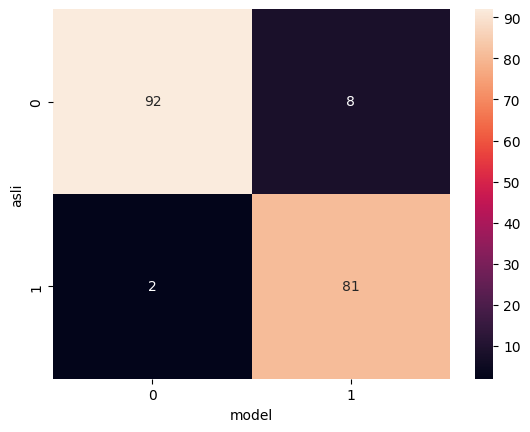

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('model')
plt.ylabel('asli')
plt.show()

In [ ]:
lr.predict(X_test)

array([2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 2])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      0.92      0.95       100
           2       0.91      0.98      0.94        83

    accuracy                           0.95       183
   macro avg       0.94      0.95      0.95       183
weighted avg       0.95      0.95      0.95       183



####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.95      0.90      0.92       100
           2       0.89      0.94      0.91        83

    accuracy                           0.92       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.92      0.92      0.92       183



####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           1     0.9899    0.9800    0.9849       100
           2     0.9762    0.9880    0.9820        83

    accuracy                         0.9836       183
   macro avg     0.9830    0.9840    0.9835       183
weighted avg     0.9837    0.9836    0.9836       183



#DATA PERJAM

##ANALISIS EKSPLORASI DATA

###Import Data

In [ ]:
df = pd.read_csv('/content/hour.csv')
# Menampilkan data
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Menghapus kolom yang tidak diperlukan dan variabel dependen
df = df.drop(columns = ['instant','dteday'])

# Mengubah variabel dependen menjadi kategorik
mean_cnt = df['cnt'].mean()
df['cnt'] = df['cnt'].apply(lambda x: 1 if x < mean_cnt else 2)

In [ ]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,1
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,1
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,1
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,1
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Memisahkan data dengan variabel dependen
df_1 = df.copy()
df_1 = df_1.drop(columns = ['cnt'])
df_1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


##VALIDASI DATA (Missing Value, Outlier, dan Transformasi)

###Cek Missing Value

<Axes: >

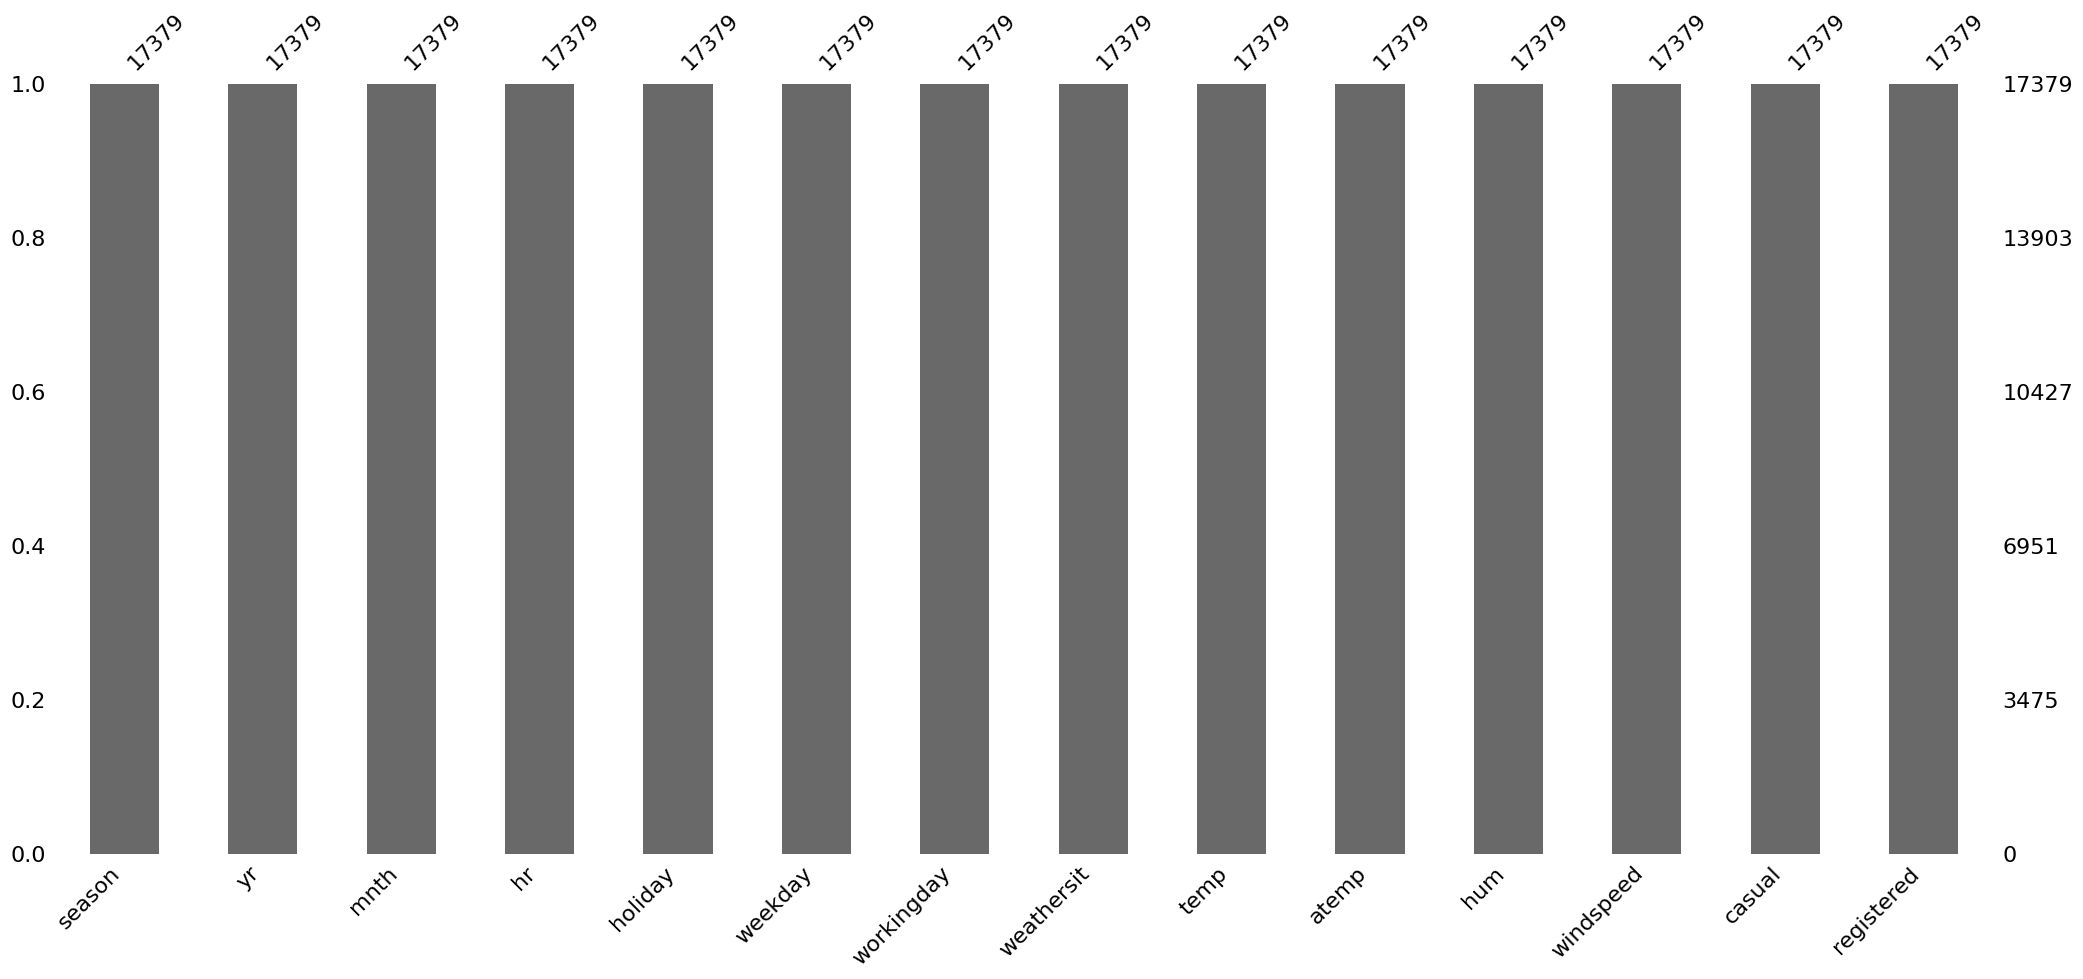

In [ ]:
msno.bar(df_1)

###Cek Outlier

In [ ]:
numerical = df_1.select_dtypes(include=['int64', 'float64']).columns
len(numerical)

14

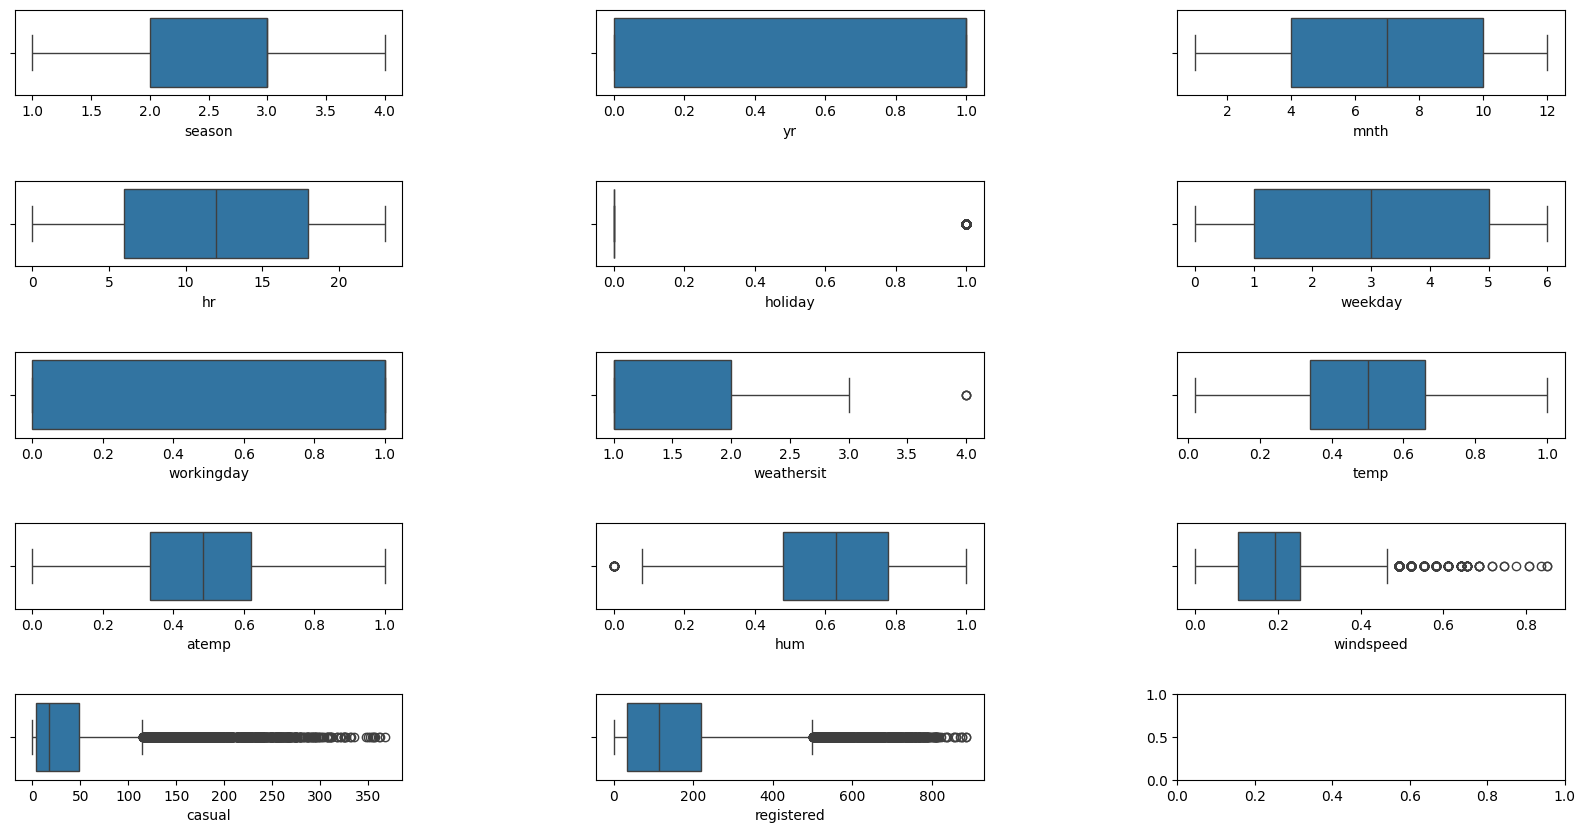

In [ ]:
#plot boxplot for each numerical variables

fig, axes = plt.subplots(5,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df_1,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

In [ ]:
# Memeriksa informasi apakah ada nilai minimum dan maksimum pada data
pd.DataFrame({
    'Min': df_1.min(),              # Menghitung nilai minimum di setiap kolom
    'Max': df_1.max()               # Menghitung nilai maksimum di setiap kolom
})

,Min,Max
season,1.00,4.0000
yr,0.00,1.0000
mnth,1.00,12.0000
hr,0.00,23.0000
holiday,0.00,1.0000
weekday,0.00,6.0000
workingday,0.00,1.0000
weathersit,1.00,4.0000
temp,0.02,1.0000
atemp,0.00,1.0000


###Penanganan Outlier (Winsorizing)

In [ ]:
def winsorizing_outlier(df_1,fitur):
  data_filtered = df_1.copy()
  for col in numerical:
    data = data_filtered[col]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data_filtered[col] = data_filtered[col].clip(lower_bound,upper_bound)

  return data_filtered

df_tmp = winsorizing_outlier(df_1,numerical)
df_tmp

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1.0,0.24,0.2879,0.81,0.0000,3,13
1,1,0,1,1,0,6,0,1.0,0.22,0.2727,0.80,0.0000,8,32
2,1,0,1,2,0,6,0,1.0,0.22,0.2727,0.80,0.0000,5,27
3,1,0,1,3,0,6,0,1.0,0.24,0.2879,0.75,0.0000,3,10
4,1,0,1,4,0,6,0,1.0,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2.0,0.26,0.2576,0.60,0.1642,11,108
17375,1,1,12,20,0,1,1,2.0,0.26,0.2576,0.60,0.1642,8,81
17376,1,1,12,21,0,1,1,1.0,0.26,0.2576,0.60,0.1642,7,83
17377,1,1,12,22,0,1,1,1.0,0.26,0.2727,0.56,0.1343,13,48


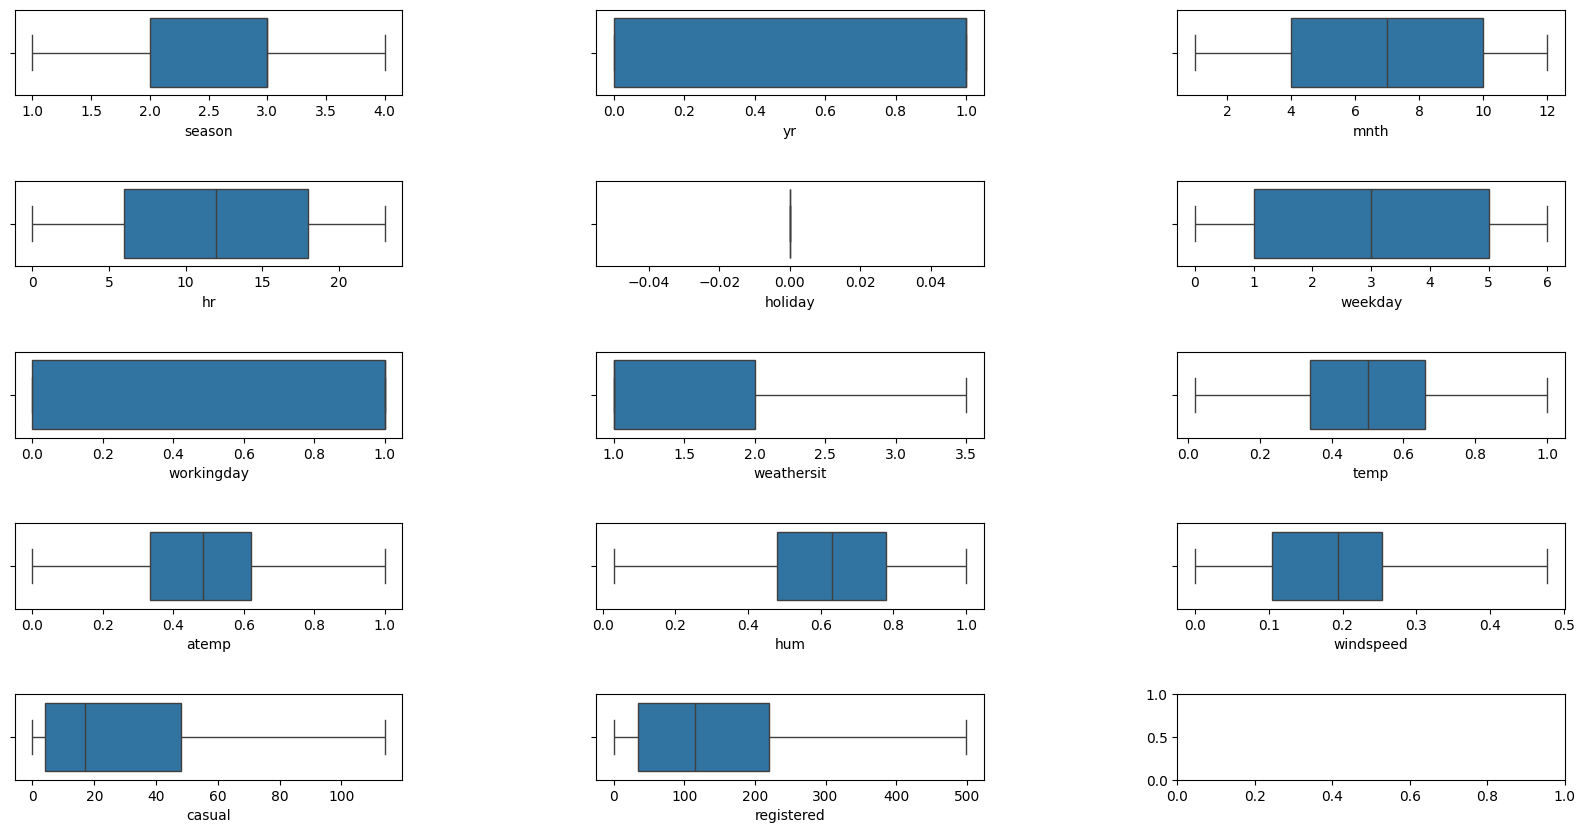

In [ ]:
fig, axes = plt.subplots(5,3,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.5)
row = 0
cols = 0

for item in numerical:
    if cols > 2:
        cols = 0
        row += 1
    ax = sns.boxplot(x=item,data=df_tmp ,ax=axes[row, cols])
    ax.set_ylabel("")
    cols += 1

In [ ]:
# Memeriksa informasi apakah ada nilai minimum dan maksimum pada data
pd.DataFrame({
    'Min': df_tmp.min(),              # Menghitung nilai minimum di setiap kolom
    'Max': df_tmp.max()               # Menghitung nilai maksimum di setiap kolom
})

,Min,Max
season,1.00,4.0000
yr,0.00,1.0000
mnth,1.00,12.0000
hr,0.00,23.0000
holiday,0.00,0.0000
weekday,0.00,6.0000
workingday,0.00,1.0000
weathersit,1.00,3.5000
temp,0.02,1.0000
atemp,0.00,1.0000


###Transformasi Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

prep_pipeline = ColumnTransformer([
    ('minmax', StandardScaler(), numerical)
    ],remainder = 'passthrough').set_output(transform="pandas")

df_trans = prep_pipeline.fit_transform(df_tmp)

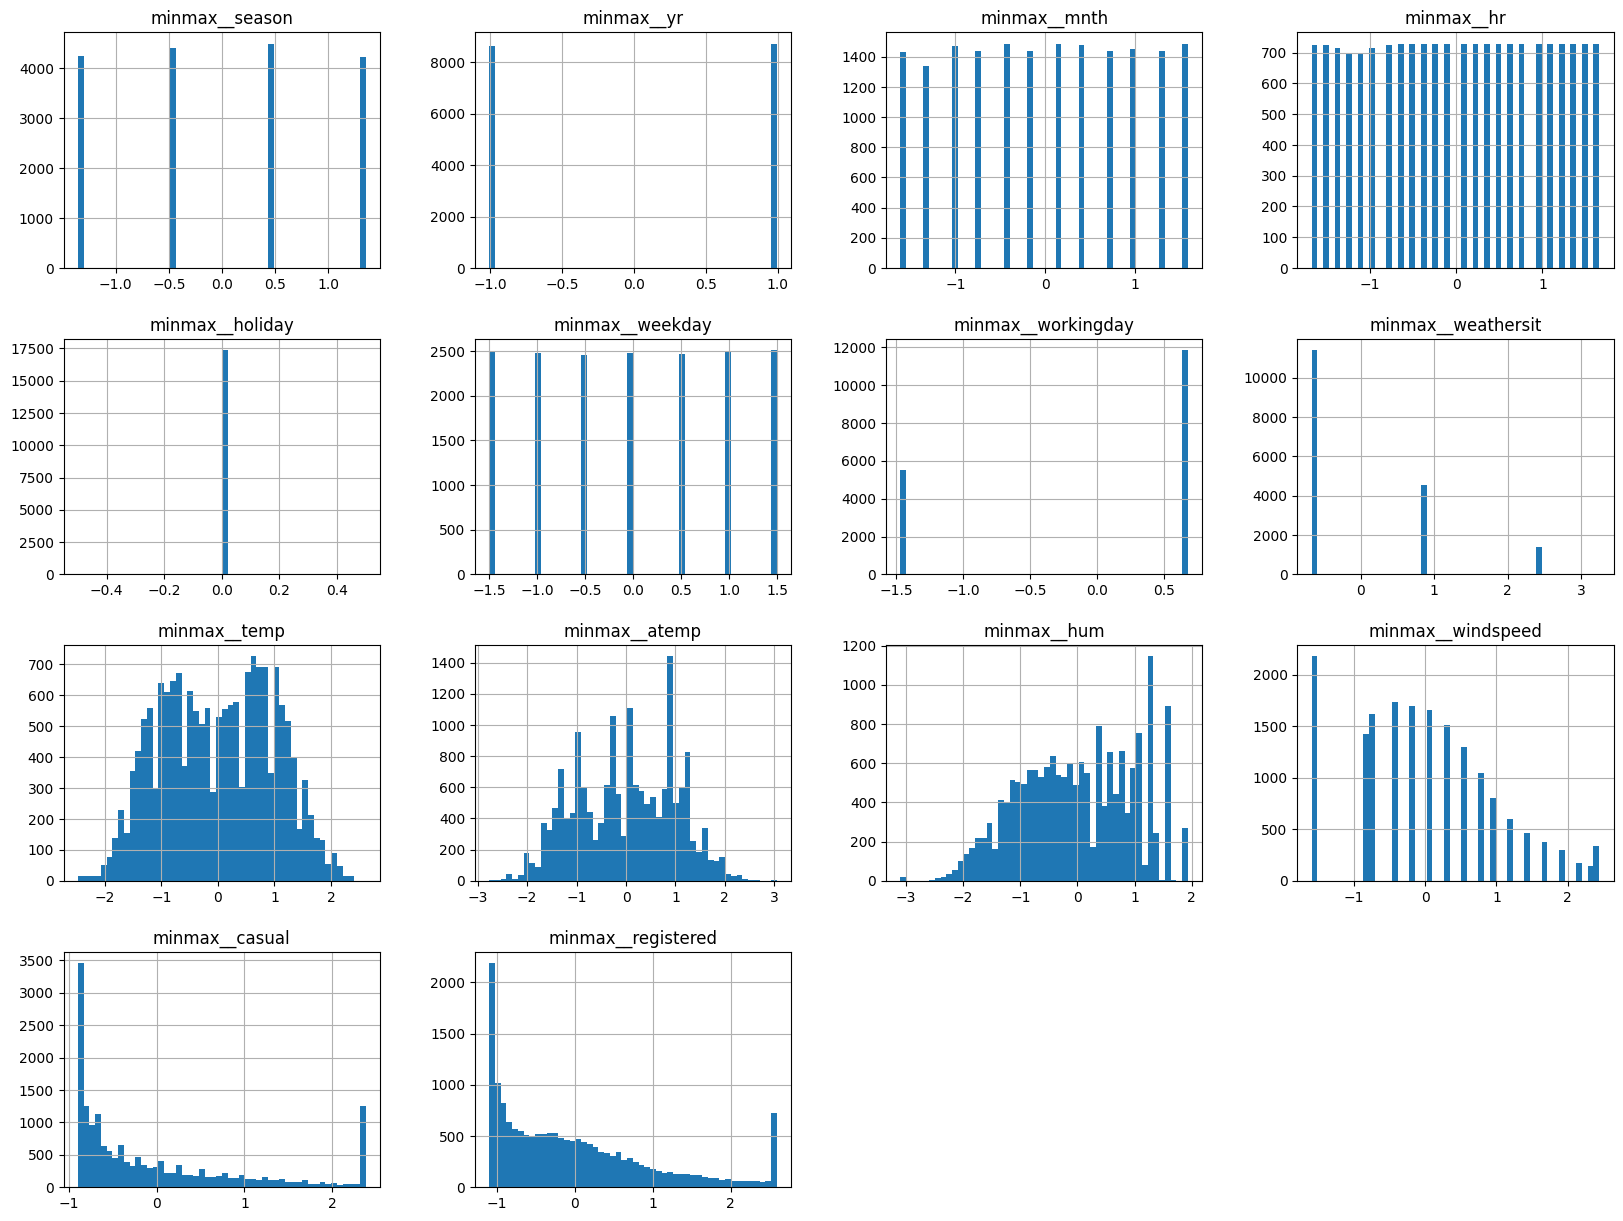

,minmax__season,minmax__yr,minmax__mnth,minmax__hr,minmax__holiday,minmax__weekday,minmax__workingday,minmax__weathersit,minmax__temp,minmax__atemp,minmax__hum,minmax__windspeed,minmax__casual,minmax__registered
0,-1.356634,-1.005134,-1.610438,-1.670004,0.0,1.493891,-1.4669,-0.665385,-1.334648,-1.093281,0.947768,-1.596452,-0.808879,-1.002197
1,-1.356634,-1.005134,-1.610438,-1.525374,0.0,1.493891,-1.4669,-0.665385,-1.438516,-1.181732,0.895902,-1.596452,-0.665251,-0.861818
2,-1.356634,-1.005134,-1.610438,-1.380744,0.0,1.493891,-1.4669,-0.665385,-1.438516,-1.181732,0.895902,-1.596452,-0.751428,-0.898759
3,-1.356634,-1.005134,-1.610438,-1.236115,0.0,1.493891,-1.4669,-0.665385,-1.334648,-1.093281,0.636571,-1.596452,-0.808879,-1.024362
4,-1.356634,-1.005134,-1.610438,-1.091485,0.0,1.493891,-1.4669,-0.665385,-1.334648,-1.093281,0.636571,-1.596452,-0.895056,-1.090857


In [ ]:
df_trans.hist(bins=50, figsize=(20,15))
plt.show();
df_trans.head()

##MODELLING

###Data Preparation

In [ ]:
df_cln = df_trans.copy()

####Train Test Split

In [ ]:
df_cln.shape

(17379, 14)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_cln
y = df['cnt']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)

(13034, 14)
(4345, 14)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=2, sampling_strategy='auto')
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)

###Data Modelling

####Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.9977750498695719
0.9981588032220944


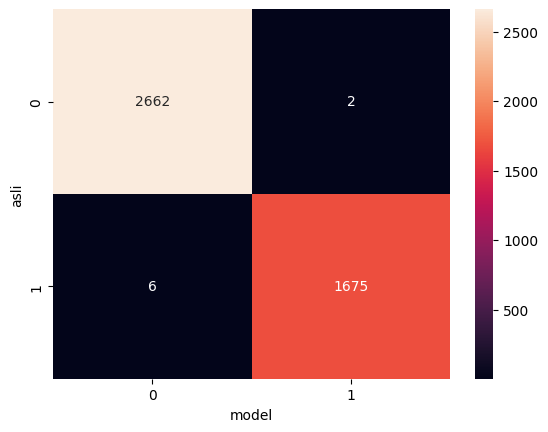

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('model')
plt.ylabel('asli')
plt.show()

In [ ]:
lr.predict(X_test)

array([2, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2664
           2       1.00      1.00      1.00      1681

    accuracy                           1.00      4345
   macro avg       1.00      1.00      1.00      4345
weighted avg       1.00      1.00      1.00      4345



####KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.94      0.97      0.95      2664
           2       0.95      0.90      0.92      1681

    accuracy                           0.94      4345
   macro avg       0.94      0.94      0.94      4345
weighted avg       0.94      0.94      0.94      4345



####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           1     0.9947    0.9947    0.9947      2664
           2     0.9917    0.9917    0.9917      1681

    accuracy                         0.9936      4345
   macro avg     0.9932    0.9932    0.9932      4345
weighted avg     0.9936    0.9936    0.9936      4345

